---

## Universidad de Costa Rica
### Escuela de Ingeniería Eléctrica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Segundo semestre del 2020

---

* Estudiante: **Nombre completo**
* Carné: **B12345**
* Grupo: **1**


# `P2` - *La demanda energética de electricidad en Costa Rica*

> Esta actividad reúne las herramientas de programación y las aplicaciones de la variable aleatoria continua empleando su definición, propiedades y funciones para analizar los registros de la demanda energética monitoreada por el Sistema Eléctrico Nacional (SEN) durante el año 2019 y determinar un modelo probabilístico de mejor ajuste basado en pruebas de bondad, a partir de información real.

---
* Elaboración de nota teórica y demostración: **Jeaustin Sirias Chacón**, como parte de IE0499 - Proyecto Eléctrico: *Estudio y simulación de aplicaciones de la teoría de probabilidad en la ingeniería eléctrica*.
* Revisión: **Fabián Abarca Calderón**


---
## 1. - Introducción: la variable aleatoria se aprende para no olvidarla

El concepto de la variable aleatoria suele ser objeto de confusión en los aprendices que se sumergen en el estudio de la teoría de la probabilidad. Es quizás, uno de los conceptos más relevantes en la construcción de modelos probabilísticos, de modo que resulta imprescindible tener una noción clara y correcta de la variable aleatoria.

No puede perderse de vista que la variable aleatoria sigue siendo una función como las demás, con la diferencia de que su dominio no es, como tradicionalmente ocurre, un conjunto numérico, sino, un espacio abstracto que no contiene otra cosa más que sucesos u ocurrencias de un experimento aleatorio. A este dominio se le llama *espacio muestral*, ¿y entonces qué que ocurrirá con el ámbito? Aunque no es posible asociar un espacio abstracto directamente con valores numéricos, sí que se puede relacionar numéricamente todos sus resultados posibles (ocurrencias); no obstante, ¿qué ocurre cuando este espacio muestral contempla infinitas probabilidades? Es precisamente acá cuando surge la **variable aleatoria continua**. Para comprender de una manera más cotidiana este concepto, supóngase el siguiente contraejemplo: 

> *Es usual observar tres tipos de medios de transporte en la ciudad: automóviles, motocicletas y bicicletas. El día de hoy me propuse a contar 150 vehículos de forma aleatoria en la carretera principal de San Pedro de Montes de Oca mientras iba por el pan de la tarde para mi madre. Cuando volví a casa tabulé mis resultados y los representé de la siguiente manera según el tipo de vehículo:*

<img align='center' src='https://i.imgur.com/2hdo8pY.png' width ="450" height=450/>


> *Luego de contabilizar la frecuencia de automóviles, bicicletas y motocicletas observadas durante el experimento me enteré de que el espacio muestral estaba limitado a solamente tres posibilidades, y aunque si mañana repitiese el ejercicio y la frecuencia de los automóviles vistos posiblemente variará, solo tendré la oportunidad de contar autos, motos y bicis...*

El caso anterior representa un variable aleatoria discreta, puesto que puede concluirse un número contable de valores de frecuencia: `x1`, `x2` y `x3`; sin embargo, ¿qué ocurrirá si ahora desea repertirse el experimento anterior pero para conocer el peso en kg de cada vehículo observado en la carretera?, ¿será posible que al menos dos vehículos compartan exactamente el mismo peso?, ¿estará el espacio muestral `S` limitado a un número de magnitudes de peso en kg? Efectivamente, no. Si de forma ideal se colocara una váscula en cada uno de los vehículos podría apreciarse que existirán valores parecidos, pero no iguales; por ejemplo, dos autos que pesen 1340.5683 kg y 1340.7324 kg, respectivamente. Esto abre paso a un número infinito de posibilidades observables aunque se limite el peso a un rango de valores (los vehículos entre 10 kg y 4000 kg, por ejemplo), de modo que no se puede hablar de una variable aleatoria solo para los vehículos que pesen 1500 kg, 2000 kg o 3000 kg siquiera, sino de la cantidad observada de vehículos que pesen más de una cantidad determinada. Esto es precisamente el concepto de la variable aleatoria continua: existe una cantidad no mensurable de probabiblidades en el espacio muestral `s`. En general se dirá que la probabilidad de encontrar un valor puntual en una variable aleatoria continua es cero. Así entonces en uno de los casos anteriores:

$$\displaystyle \frac{1500.\overline{0} \text{ kg}}{\text{Infinitos pesos entre 10 kg y 4000 kg}} \approx 0$$

Paradójicamente entonces la variable aleatoria no es variable ni mucho menos aleatoria, sino determinística (devuelve siempre el mismo resultado para un conjunto de valores). Lo aleatorio es la ocurrencia $\displaystyle x_{n}$ en el ámbito de la función.

---
## 2. - Contexto: el *Sistema Eléctrico Nacional* (SEN) de Costa Rica

El [Centro Nacional de Control de Energía](https://apps.grupoice.com/CenceWeb/CenceMain.jsf) (CENCE) es el ente estatal encargado de registrar, manipular y analizar el sistema eléctrico nacional de Costa Rica en los ámbitos de generación, distribución y demanda de la energía eléctrica en el país. La matriz energética nacional está administrada por siete empresas distribuidoras, a saber:

* **Instituto Costarricense de Electricidad (ICE)**
* **Compañía Nacional de Fuerza y Luz (CNFL)**
* **Junta Administrativa del Servicio Eléctrico Municipal de Cartago (JASEC)**
* **Coopeguanacaste R.L.**
* **Coopelesca R.L.**
* **Coopesantos R.L.**
* **Empresa de Servicios Públicos de Heredia (ESPH)**


<img align='center' src='https://i.imgur.com/pPc9mIA.png' width ="700" height=400/>


El servicio y el costo de las tarifas eléctricas ofrecidas por cada una de las empresas depende de la ubicación, el sector que lo solicita (residencial, industrial, comercial...) y las disposiciones de la [Autoridad Reguladora de los Servicios Públicos](https://aresep.go.cr/electricidad) (ARESEP). A nivel nacional se hallan establecidos tres períodos por concepto de actividad de consumo energético durante el día:

* **Período de punta**: Entre las **10:01** y las **12:30** horas, y entre las **17:31** y las **20:00** horas para un total de cinco horas diarias.

* **Período de valle**: Se comprende entre las **06:01** y las **10:00** horas, y entre las **12:21** y las **17:30** para total de nueve horas diarias.

* **Período nocturno**: Abarca desde las **20:01** hasta las **06:00** del próximo día, para un total de 10 horas.

La demanda energética a nivel nacional es constantemente monitoreada en intervalos de 15 minutos a lo largo de los días durante todo el año. Existen temporadas o situaciones cuando la demanda es particularmente mayor por temas sociales y/o económicos; por ejemplo, las fiestas de fin de año se caracterizan por celebrar la **Navidad** y el **Año Nuevo**: las casas, las vías públicas y los parques se iluminan con luces festivas al menos durante todo el mes de diciembre y poco antes. Asimismo, aumenta el uso de los hornos eléctricos en las familias para elaborar recetas apropiadas para la fecha. 

Otro caso es la actual [emergencia nacional por el COVID-19](https://www.facebook.com/watch/?v=862104867616321), la cual ha repercutivo considerablemente en todas las actividades habituales. La demanda es medida en **megawatt (MW)** por razones convenientes. 

---
## 3. - Aplicación: construyendo un modelo probabilístico  basado en demanda energética

### 3.1 El preámbulo
*¿Qué puede esperarse de la demanda energética nacional si fuese una variable aleatoria?, ¿sería esta última, discreta o continua?, ¿podría aproximarse su distribución anual, mensual, diaria u horaria hacia un modelo de densidad probabilístico?*

Al igual que en el ejemplo del peso en los vehículos, el espacio muestral de la demanda de energía es infinito para cualquier intervalo de valores [a, b]. Podría ocurrir que a las `00:00` de hoy la demanda registrada sea `909.8934 MW` mientras que mañana a la misma hora será `909.2232 MW` y al siguiente, `909.873666641 MW`; es decir, el experimento de medir la demanda en ese período se ve inmerso en un sinnúmero de posibilidades, de modo que es una variable aleatoria continua.

Las funciones de distribución y de densidad de una variable aleatoria son `descripciones completas` de su modelo probabilístico; sin embargo, la función de densidad de probablidad (*PDF*, por sus siglas en inglés) suele ser más relevante en términos de análisis ofreciendo mayor información. Las funciones continuas de de probabilidad son muy variadas, las hay de todas formas. Algunas de ellas describen sistemas habituales:

* Distribución normal
* Distribución de Rayleigh
* Distribución exponencial
* Distribución uniforme
* Distribución de Pareto
* Distribución de Burr
* Distribución Gamma, Beta y Alfa
* Distribución *Crystal Ball*

**¿Qué hace a una distribución mejor que otra al ajustar una población?**

En términos relativos, depende en gran medida del sistema o proceso que se estudia. Como se expuso anteriormente hay una enorme familia de funciones de probabilidad. A *priori* habrá una de ellas que describa una variable aleatoria en mejor medida que las demás, a este procedicimiento se le denomina `bondad de ajuste` y se basa en evaluar discrepancias, residuos y/o frecuencias de dos o más distribuciones, generalmente con la intención de conocer, si las muestras provienen de una misma distribución, si las muestras observadas siguien una distribución en particular o bien para evaluar qué tanto se ajusta un modelo probabilístico construido a partir de datos observados. En su mayoría se parte de una hipótesis nula $H_{O}$ que supone la siguiente premisa:

> *Los datos observados y los predichos son iguales hasta que no se pruebe lo contrario.*

Entre los métodos más frecuentes para estudiar la bondad de ajuste se destaca [La prueba de Smirnov-Kogomorov](https://es.wikipedia.org/wiki/Prueba_de_Kolmogorov-Smirnov) y [La prueba del chi-cuadrado de Pearson](https://en.wikipedia.org/wiki/Chi-squared_test). Adicionalmente el uso de índices de error como la [raíz del error cuadrático medio](https://es.wikipedia.org/wiki/Ra%C3%ADz_del_error_cuadr%C3%A1tico_medio) (RMSE) o el [error cuadrático medio](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio#:~:text=En%20el%20an%C3%A1lisis%20de%20regresi%C3%B3n,n%C3%BAmero%20de%20grados%20de%20libertad.) (SSE) para contrastar las muestras de una población son relevantes para un segundo o tercer criterio. 

Los momentos centrales también suelen revelar información crucial una vez que se ha identificado y probado un modelo probabilístico de mejor ajuste, pues dan a conocer las tendencias de la población en estudio. Estos resultados se utilizan para obtener conclusiones, predecir y estimar eventos, y ejecutar decisiones a partir de datos observados en el modelo. 

* **La media**: Define la tendencia de un valor central en la población.
* **La varianza**: Ofrece una medida de dispersión respecto a la media. Entre más baja sea su magnitud, indica que la mayoría de las muestras se acercan al valor central y viceversa. 
* **Coeficiente de simetría**: Arroja el grado de inclinación hacia donde la mayoría de los valores tienden a posicionarse. Un coeficiente positivo indica una cola hacia la derecha; uno negativo, hacia la izquiera; si es cero, entonces es una distribución normal.
* **Curtosis**: Define el grado de 'abultamiento' vertical alrededor del valor central. Puede indicar la presencia de anomalías en la población de muestras. La distribución normal es mesocúrtica (k = 0).


### 3.2. - Desarrollo

Para la siguiente actividad se cuenta con una base de datos que contiene la demanda energética nacional del año 2019 por hora como se muestra a continuación:


<img align='center' src='https://i.imgur.com/2PwdGF0.png' width ="1000" height=600/>

Se sabe que dicha población es una variable aleatoria continua y además se desea hallar un modelo probabilístico horario que se ajuste lo mejor posible a lo observado de acuerdo con las pruebas de de bondad de ajuste vistas anteriormente; por ejemplo, analizar el comportamiendo de la demanda a las 18:00 horas durante todos los días del año. El módulo [stats](https://docs.scipy.org/doc/scipy/reference/stats.html) de Scipy es un recurso muy provechoso a tomar en cuenta para ejemplificar la presente aplicación de forma programada. La estrategia a implementar se elaborará bajo los siguientes pasos:


* 1. Acondicionar la base de datos para obtener la población de muestras a la hora de interés.
* 2. Ajustar un modelo probabilístico basado en la función de densidad de probabiliad de las distribuciones a evaluar sobre la población observada.
* 3. Determinar el mejor modelo probabilístico mediante las pruebas de bondad de ajuste `chi-cuadrado`, `Smirnov-Kolgomorov` y el índicie de error `RMSE`.
* 4. Determinar los cuatro primeros momentos centrales para el mejor modelo.
* 5. Visualizar los resultados obtenidos.

Para lograr los puntos anteriores se emplean entonces las siguientes librerías científicas que simplifican el procedimiento a seguir:

```python
import numpy as np              # para manipular datos
import matplotlib.pyplot as plt # para visualizar resultados
import pandas as pd             # para acondicionar la base de datos de demanda
import scipy.stats as spsts     # la música de la fiesta
import datetime                 # para utilizar formatos horarios de 24 h
```

### 3.2.1 Lectura y acondicionamiento de los datos

Es una buena práctica de programación desarrollar código empleando funciones, puesto que permite la generalización del proceso; por ejemplo, para este caso es útil elaborar una función que no solamente acondicione la demanda a las 18:00, sino a cualquier hora. Dicho de este modo entonces el **tiempo** debe ser un parámetro de ajuste variable en los argumentos.

**Sobre el formato .json**: [JSON](https://es.wikipedia.org/wiki/JSON) es un formato de texto de alto nivel, muy utilizado en el intercambio de información por su alta legibilidad y fácil manejo de la sintaxis. La librería de manipulación de datos, [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), ofrece un método especialmente adecuado para leer dicho formato. Para esta ocasión la base de datos importada se encuentra escrita en JSON para familiarizar su uso.

In [43]:
import pandas as pd
import numpy as np

def acondicionar_datos(arch_json, tiempo):
    '''Solicita la base de datos y la hora de referencia'''
    
    df =  pd.read_json(arch_json) #se carga el marco de datos
    df = np.array(df) #se convierte el frame en un array de numpy

    #se extraen las fechas y las demandas en arreglos separados:
    muestras = len(df)
    vector_fecha = []; demanda = []
    for datos in range(muestras):
        hora = df[datos][0]['fechaHora']
        if int(hora[11:13]) == tiempo:
            demanda.append(df[datos][0]['MW'])

    return demanda

### 3.2.2 Ajuste y visualización

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spsts
import datetime

def evaluar_modelos(datos, dists, Bins, hora):
    '''Evalúa la bondad de ajuste de los datos con los modelos utilizados'''
    
    # Condiciones iniciales
    rmse_min = np.inf
    p_max = 0     # el mejor p en chisqr test
    kspmax = 0    # el mejor p en KStest
    np.seterr(all = 'ignore')
    hora = datetime.time(hora)

    # Se prepara el espacio de visualización:
    fig, ax = plt.subplots(1, 3, figsize = (16, 5), tight_layout = True)
    #fig1:
    ax[0].set_title('Distribución observada: demanda a las {}'.format(hora))
    ax[0].set_xlabel('Potencia [MW]')
    ax[0].set_ylabel('Frecuencia')
    #fig2:
    ax[1].set_title('Ajuste por funciones de densidad')
    ax[1].set_ylabel('Frecuencia')
    ax[1].set_xlabel('Potencia [MW]')
    #fig3:
    ax[2].set_title('Mejor ajuste basado en criterios de bondad')
    ax[2].set_ylabel('Frecuencia')
    ax[2].set_xlabel('Potencia [MW]')

    # Distribución observada:
    ocurrencias_exp, bins = np.histogram(datos, bins = Bins)
    for i in range(Bins):
        if ocurrencias_exp[i] == 0:
            ocurrencias_exp[i] = 1

    bins_centrados = (bins + np.roll(bins, -1))[:-1] / 2.0 
    escala = len(datos) * (max(datos) - min(datos)) / len(bins_centrados)

    # Probando las distribuciones ingresadas
    for distribucion in dists:
        dist = getattr(spsts, distribucion)
        param = dist.fit(datos)
        pdf = dist.pdf(bins_centrados, *param)
        ocurrencias_teo = [int(round(freq)) for freq in escala * pdf]
        
        # Visualizado
        pdf_plot = dist.pdf(np.arange(min(datos) * 0.96, max(datos) * 1.04, 1), *param)
        ax[1].plot(np.arange(min(datos) * 0.96, max(datos) * 1.04, 1), escala * pdf_plot, lw = 3.5, label = '{}'.format(distribucion))

        # Bondad de ajuste por chi-cuadrado
        coef_chi, p = spsts.chisquare(f_obs = ocurrencias_teo, f_exp = ocurrencias_exp)
        if p > p_max:
            p_max = p
            dist_chi = distribucion
            mod_chi = dist, param, pdf

        # Bondad de ajuste por RMSE(Root-Mean-Square Error)
        diferencia = (ocurrencias_teo - ocurrencias_exp)**2
        rmse = np.sqrt(np.mean(diferencia))
        if rmse < rmse_min:
            rmse_min = rmse
            dist_rmse = distribucion
            mod_rmse = dist, param, pdf

        # Bondad de ajuste por Kolvogorov-Smirnov
        D, ksp = spsts.kstest(datos, distribucion, args = param)
        if ksp > kspmax:
            kspmax = ksp
            dist_ks = distribucion

    # Visualizar resultados
    ax[0].hist(datos, bins = Bins, color = 'tomato', histtype='bar', rwidth=0.8)
    ax[1].hist(datos, bins = Bins, color = 'palevioletred', histtype='bar', rwidth=0.8)
    ax[2].hist(datos, bins = Bins, color = 'b')

    # Decidir el mejor modelo
    if dist_chi == dist_rmse or dist_chi == dist_ks:
        params = mod_chi[1]
        mejor_ajuste = dist_chi
        ax[2].hist(datos, bins = Bins, color = 'cornflowerblue', label = 'Distribución observada')
        ax[2].bar(bins_centrados, mod_chi[2] * escala, width = 6, color = 'r', label = 'Mejor ajuste: {}'.format(dist_chi))
        m, v, s, k = mod_chi[0].stats(*params, moments = 'mvsk') 

    elif dist_rmse == dist_ks:
        params = mod_rmse[1]
        mejor_ajuste = dist_rmse
        ax[2].hist(datos, bins = Bins, color = 'cornflowerblue', label = 'Distribución observada')
        ax[2].bar(bins_centrados, mod_rmse[2] * escala, width = 6, color = 'r', label = 'Mejor ajuste: {}'.format(dist_rmse))
        m, v, s, k = mod_rmse[0].spsts(*params, moments = 'mvsk')

    # Imprimir resumen y resultados
    print('Resumen:\nEl modelo de distribución con el menor error RMS es:', dist_rmse)
    print('El modelo de distribución con mejor bondad de ajuste en la prueba de chi-cuadrado es:', dist_chi)
    print('El modelo de distribución con mejor bondad de ajuste en la prueba de Smirnov-Kogomorov es:', dist_ks)
    print('El mejor modelo probabilístico determinado ocurre con la distribución:', mejor_ajuste)
    print('Cantidad de muestras incluidas:', len(datos), 'días a las', hora, 'horas')
    print('Máximo:', max(datos), 'MW')
    #print('Media:', np.mean(datos), 'MW')
    print('Mínimo:', min(datos), 'MW')
    print('Tipo: Demanda energética horaria')
    print('\nMomentos para el modelo de mejor ajuste:', '\nMedia:', m, '\nVarianza:', v, '\nCoef. Simetría:', s, '\nCurtosis:', k)
    ax[1].legend()
    ax[2].legend()
    plt.show()

### 3.3.3. - Evaluando resultados

Llegado a este punto, ahora solo se requiere llamar las dos funciones desarrolladas y elegir `la base de datos`, `las distribuciones`(la galería de distribuciones continuas disponibles en el módulo `stats` puede consultarse [acá](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions)) y `la hora` desean evaluarse en las mismas como se muestra a continuación:

1457.978549019608 -0.6803719030269385 8295.162165996602 -0.3509745605615837
Resumen:
El modelo de distribución con el menor error RMS es: beta
El modelo de distribución con mejor bondad de ajuste en la prueba de chi-cuadrado es: beta
El modelo de distribución con mejor bondad de ajuste en la prueba de Smirnov-Kogomorov es: beta
El mejor modelo probabilístico determinado ocurre con la distribución: beta
Cantidad de muestras incluidas: 255 días a las 18:00:00 horas
Máximo: 1602.64 MW
Mínimo: 1171.15 MW
Tipo: Demanda energética horaria

Momentos para el modelo de mejor ajuste: 
Media: 1457.526794785272 
Varianza: 7931.395743639329 
Coef. Simetría: -0.6460732802624384 
Curtosis: -0.10503249832772582


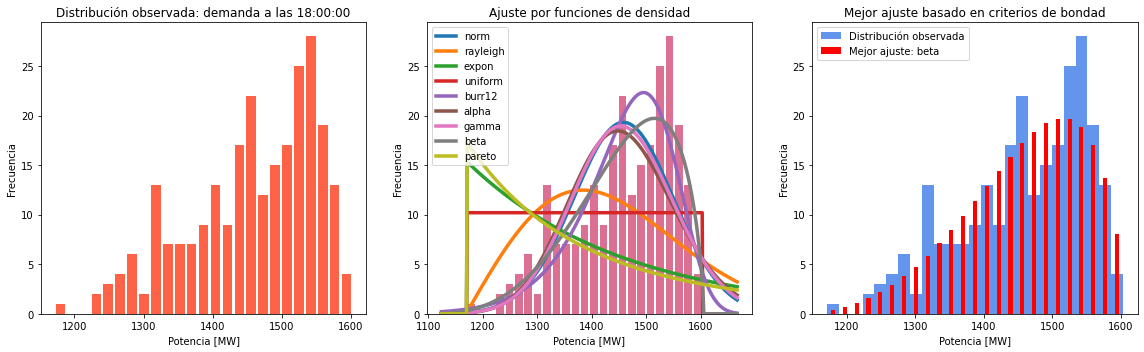

In [45]:
# Hora, en el intervalo [0, 23] (tipo int)
h = 18

# Distribuciones a evaluar
distribuciones = ['norm', 'rayleigh', 'expon', 'uniform', 'burr12', 'alpha', 'gamma', 'beta', 'pareto']

# Llamar a las funciones
demandas = acondicionar_datos('demanda2019.json', h)

############HALLAR LOS MOMENTOS PERO PARA LOS DATOS REALES###########

M = np.mean(demandas)
S = spsts.skew(demandas)
V = (spsts.tstd(demandas))**2
K = spsts.kurtosis(demandas)
print(M, S, V, K)


evaluar_modelos(demandas, distribuciones, Bins = 25, hora = h)

#### Observaciones

## 4. - Asignaciones del proyecto

### 4.1. - Comparación de consumo de potencia para distintas horas del día

La curva de consumo de potencia diaria del SEN muestra cambios importantes durante el día, así que es esperable encontrar comportamientos distintos en la distribución de probabilidad para cada hora.

* (40%) Encuentre la distribución de mejor ajuste para las dos horas asignadas

Resumen:
El modelo de distribución con el menor error RMS es: norm
El modelo de distribución con mejor bondad de ajuste en la prueba de chi-cuadrado es: norm
El modelo de distribución con mejor bondad de ajuste en la prueba de Smirnov-Kogomorov es: norm
El mejor modelo probabilístico determinado ocurre con la distribución: norm
Cantidad de muestras incluidas: 255 días a las 03:00:00 horas
Máximo: 1030.47 MW
Mínimo: 803.04 MW
Tipo: Demanda energética horaria

Momentos para el modelo de mejor ajuste: 
Media: 935.2050588235294 
Varianza: 1826.9855912710498 
Coef. Simetría: 0.0 
Curtosis: 0.0


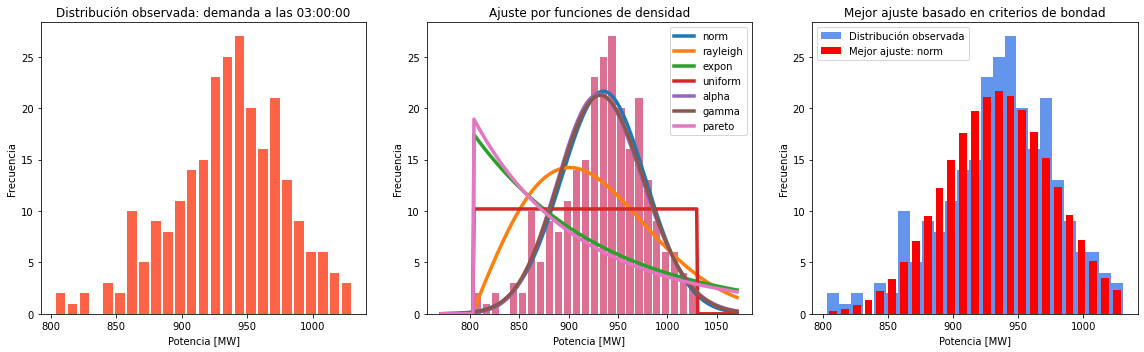

In [46]:
#LAS HORAS A LAS QUE DECIDI HACER MI INVESTIGACION FUERON A LAS 03:00 Y A LAS 21:00

#CASO 1 - a las 03:00
h = 3
distribuciones = ['norm', 'rayleigh', 'expon', 'uniform', 'alpha', 'gamma', 'pareto']
demandas = acondicionar_datos('demanda2019.json', h)
evaluar_modelos(demandas, distribuciones, Bins = 25, hora = h)

Resumen:
El modelo de distribución con el menor error RMS es: norm
El modelo de distribución con mejor bondad de ajuste en la prueba de chi-cuadrado es: norm
El modelo de distribución con mejor bondad de ajuste en la prueba de Smirnov-Kogomorov es: norm
El mejor modelo probabilístico determinado ocurre con la distribución: norm
Cantidad de muestras incluidas: 255 días a las 21:00:00 horas
Máximo: 1568.7 MW
Mínimo: 1177.74 MW
Tipo: Demanda energética horaria

Momentos para el modelo de mejor ajuste: 
Media: 1406.435843137255 
Varianza: 5217.574298798923 
Coef. Simetría: 0.0 
Curtosis: 0.0


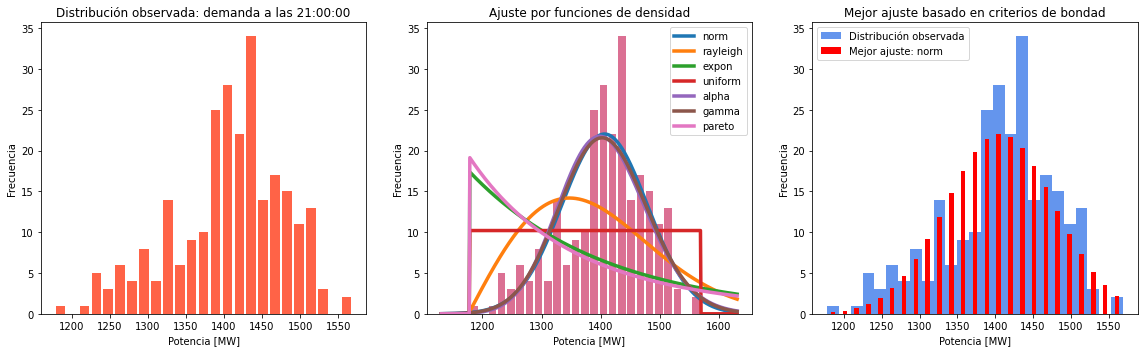

In [47]:
#CASO 2 - a las 21:00
h = 21
distribuciones = ['norm', 'rayleigh', 'expon', 'uniform', 'alpha', 'gamma', 'pareto']
demandas = acondicionar_datos('demanda2019.json', h)
evaluar_modelos(demandas, distribuciones, Bins = 25, hora = h)

### 4.2. - Obtención de los momentos de los modelos de distribución por hora

Resuma estos hallazgos en una tabla con los cuatro momentos más importantes (y la desviación estándar) para cada modelo de cada hora analizada.

* (30%) Completa la tabla de resultados de los momentos, haciendo los cálculos respectivos con Python o con sus modelos (mostrando las ecuaciones respectivas).

In [48]:
#CASO 1 -  a las 03:00
h = 3
demandas = acondicionar_datos('demanda2019.json', h)
M = np.mean(demandas)
S = spsts.skew(demandas)
V = (spsts.tstd(demandas))**2
STD = spsts.tstd(demandas)
K = spsts.kurtosis(demandas)
print('Para las 03:00 los momentos de los datos reales son:0', M, S, V, STD, K)

#CASO 2 - a las 21:00
h = 21
demandas = acondicionar_datos('demanda2019.json', h)
M = np.mean(demandas)
S = spsts.skew(demandas)
V = (spsts.tstd(demandas))**2
STD = spsts.tstd(demandas)
K = spsts.kurtosis(demandas)
print('Para las 21:00 los momentos de los datos reales son:0', M, S, V, STD, K)



Para las 03:00 los momentos de los datos reales son:0 935.2050588235294 -0.40962257206172376 1834.1784479295968 42.827309604148574 0.19986106595244335
Para las 21:00 los momentos de los datos reales son:0 1406.435843137255 -0.5991383356403462 5238.115929896557 72.37482939459379 0.1148341180530057


| Momento         | Fuente   | 03:00 | 21:00 |
|-----------------|----------|---------|---------|
| **Media**       | *Modelo* | 935.205     | 1406.436     |
| **Media**       | *Datos*  | 935.205     | 1406.436     |
| **Varianza**    | *Modelo* | 1826.986     | 5217.574     |
| **Varianza**    | *Datos*  | 1834.178     | 5238.116     |
| **Desviación**  | *Modelo* | 42.743    | 72.233    |
| **Desviación**  | *Datos*  | 42.827    | 72.375    |
| **Inclinación** | *Modelo* | 0.0     | 0.0     |
| **Inclinación** | *Datos*  |   -0.410   | -0.599     |
| **Kurtosis**    | *Modelo* | 0.0     | 0.0     |
| **Kurtosis**    | *Datos*  | 0.200     | 0.115     |

### 4.3. - Análisis de los datos obtenidos

De la comparación de las horas estudiadas, 

* (30%) Explique las posibles razones de las diferencias observadas, desde una interpretación estadística.

<!-- Inicie aquí la explicación. Puede incluir imágenes, tablas, fragmentos de código o lo que considere necesario. -->

**Análisis**

---

### Universidad de Costa Rica
#### Facultad de Ingeniería
##### Escuela de Ingeniería Eléctrica

---